# Machine Learning

* 기계학습 및 인공지능에 대해서 설명하지 않음
    * 관심이 있다면 요즘 많은 무료 강의들이 있고 책도 많기에 따로 공부하기 바람
    * 본 강의에서는 분석한 데이터를 사용하여 결과를 만들어 내는 도구로써의 기계학습만을 다룸 

In [2]:
!pip install scikit-learn

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

* 사용할 알고리즘
    * Logistic Regression
    * Decision Tree
    * Random Forest

# Data analysis

* 롤 챌린저 게임 랭크 데이터 분석
* 많은 데이터를 수업 도중에 수집하기는 어렵기에 이미 수집된 데이터 사용
* ref
    > https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-ranked-games2020

## Data information

* gameId: 고유 ID
* gameDuraton : 경기 시간(초단위)
* blueWins/ redWins: 승리 유무
* blueFirstBlood/ redFirstBlood: 퍼블 유무
* blueFirstTower/ redFirstTower: 포탑 선점 유무
* blueFirstBaron/ redFirstBaron: 바론 선점 유무
* blueFirstDragon/ redFirstDragon: 용 선점 유무
* blueFirstInhibitor/ redFirstInhibitor: 억제기 선점 유무
* blueDragonKills/ redDragonKills: 잡은 용의 수
* blueBaronKills/ redBaronKills: 잡은 바론의 수
* blueWardPlaced/ redWardPlaced : 설치한 와드의 개수
* blueWardkills/ redWardkills : 제거한 와드의 개수
* blueKills/ redKills : 팀의 킬 횟수
* blueDeath/ redDeath : 팀의 죽은 횟수
* blueAssist/ redAssist : 팀의 어시스트 횟수
* blueChampionDamageDealt/ redChampionDamageDealt : 상대팀에게 가한 피해량
* blueTotalGold/ redTotalGold : 총 골드량
* blueTotalMinionKills/ redTotalMinionKills : 잡은 미니언의 수
* blueTotalLevel/ redTotalLevel : 팀의 레벨 합
* blueAvgLevel/ redAvgLevel : 팀의 레벨 평균
* blueJungleMinionKills/ redJungleMinionKills : 잡은 정글 미니언의 수
* blueKillingSpree/ redKillingSpree : 팀의 연속 킬 횟수
* blueTotalHeal/redTotalHeal : 팀의 총 회복량
* blueObjectDamageDealt/redObjectDamageDealt : 팀이 오브젝트에 가한 피해량

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Challenger_Ranked_Games.csv')

In [6]:
df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [8]:
blue_df = df.iloc[:, 1:26]
red_df = pd.concat([df.iloc[:, 1], df.iloc[:, 26:]], axis=1)

In [10]:
blue_df

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,1,2,2,11,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,50,99418,41437,438,60,12.0,106,8,20122,13309
26900,970,0,1,1,0,1,0,3,0,5,...,36,61816,61221,346,65,13.0,28,5,32837,44640
26901,1480,0,1,1,0,1,0,1,0,4,...,19,51604,45013,568,63,12.6,132,4,18131,45242
26902,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486


In [11]:
red_df

,gameDuraton,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,1,0,1,0,1,1,3,0,9,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,0,1,1,0,0,0,0,0,2,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,1,1,1,0,1,1,2,0,5,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,1,1,1,0,0,0,3,1,6,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,0,0,0,0,0,0,3,1,6,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,1,0,1,0,1,0,2,0,4,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,1,0,0,0,0,1,0,0,10,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,1,0,0,0,0,0,1,0,3,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1837,0,0,1,1,0,0,2,1,4,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [10]:
for i in blue_df.iloc[:, 2:7].columns:
    display(pd.crosstab(blue_df[i], blue_df['blueWins'], margins=True).style.background_gradient(cmap='Reds'))

blueWins,0,1,All
blueFirstBlood,,,
0,8066,5291,13357
1,5384,8163,13547
All,13450,13454,26904


blueWins,0,1,All
blueFirstTower,,,
0,9397,3366,12763
1,4053,10088,14141
All,13450,13454,26904


blueWins,0,1,All
blueFirstBaron,,,
0,12286,8051,20337
1,1164,5403,6567
All,13450,13454,26904


blueWins,0,1,All
blueFirstDragon,,,
0,9754,6218,15972
1,3696,7236,10932
All,13450,13454,26904


blueWins,0,1,All
blueFirstInhibitor,,,
0,12646,4381,17027
1,804,9073,9877
All,13450,13454,26904


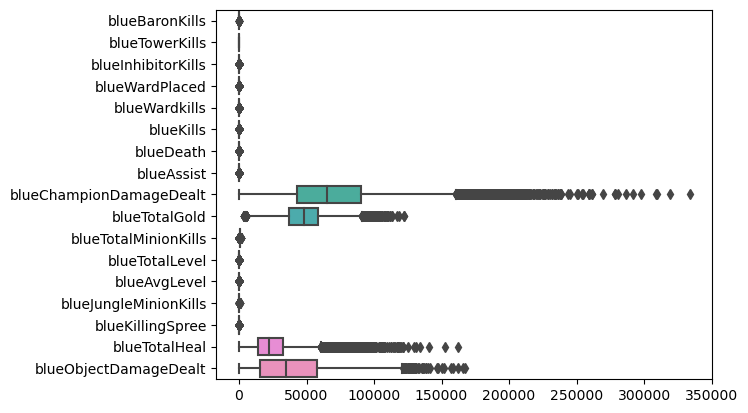

In [12]:
sns.boxplot(data=blue_df.iloc[:, 8:26], orient='h')
plt.show()

In [13]:
for feature in ['blueChampionDamageDealt', 'blueTotalGold', 'blueTotalHeal', 'blueObjectDamageDealt']:
    q1 = blue_df[feature].quantile(0.25)
    q3 = blue_df[feature].quantile(0.75)
    iqr = q3 - q1

    condition=blue_df[feature] > (q3 + 1.5 * iqr)
    target=blue_df[condition].index
    blue_df.drop(target,inplace=True)

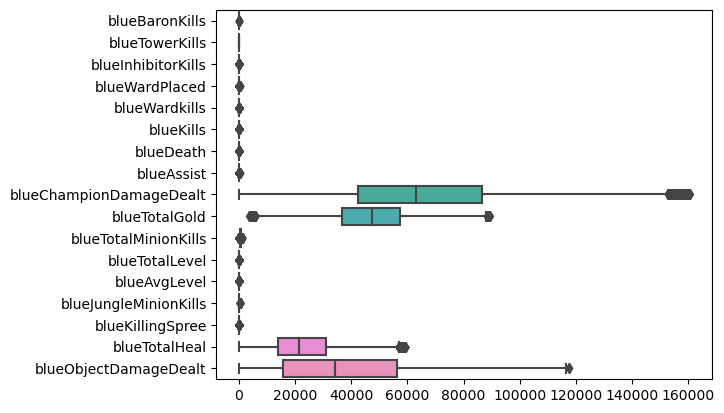

In [14]:
sns.boxplot(data=blue_df.iloc[:, 8:26], orient='h')
plt.show()

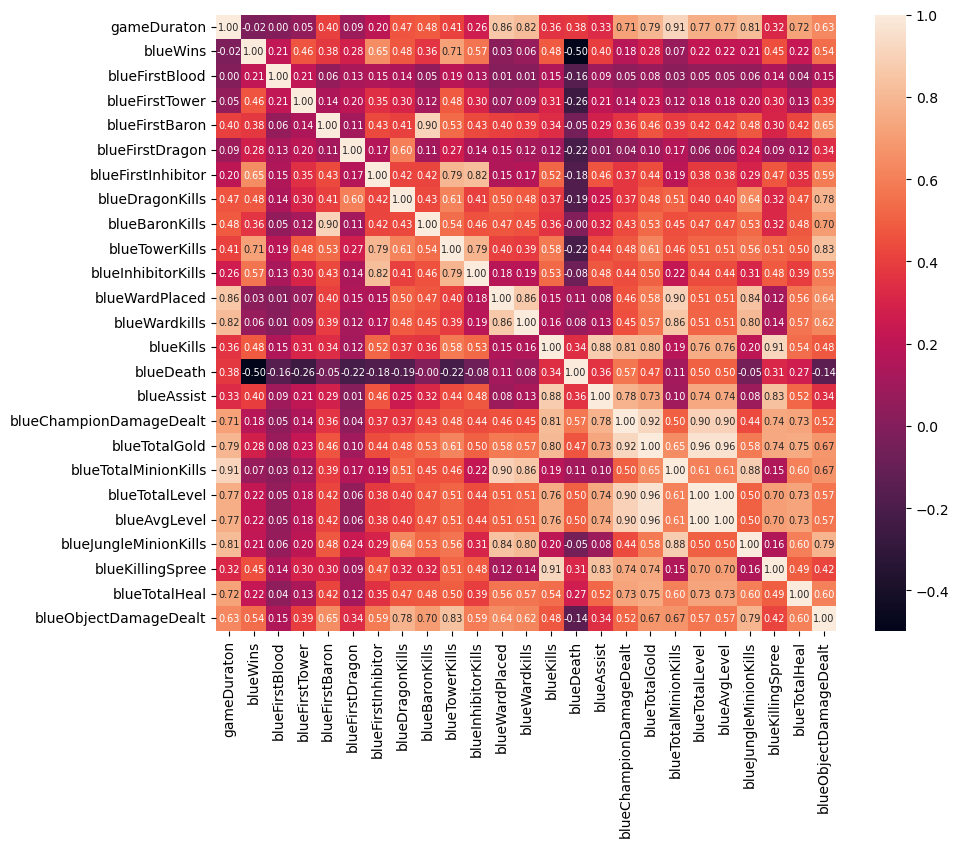

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=blue_df.corr(), annot=True, annot_kws={"size": 7}, fmt=".2f")
plt.show()

# Learning

## Feature selection

* blueDeath를 포함하면 정확도 매우 향상
    * 처음엔 없이 해볼 것

In [33]:
corr1 = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] >= 0.375].index
corr2 = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] <= -0.375].index
corr = np.append(corr1, corr2)
#corr = corr1
corr

array(['blueWins', 'blueFirstTower', 'blueFirstBaron',
       'blueFirstInhibitor', 'blueDragonKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueKills', 'blueAssist',
       'blueKillingSpree', 'blueObjectDamageDealt', 'blueDeath'],
      dtype=object)

corr = blue_df.corr().loc['blueWins'][blue_df.corr().loc['blueWins'] >= 0.375].index
corr

In [34]:
blue_df[corr[1:]]

,blueFirstTower,blueFirstBaron,blueFirstInhibitor,blueDragonKills,blueTowerKills,blueInhibitorKills,blueKills,blueAssist,blueKillingSpree,blueObjectDamageDealt,blueDeath
0,0,0,0,0,0,0,15,22,4,5675,31
1,0,0,0,2,4,0,19,31,3,45303,8
2,0,0,0,0,0,0,5,8,0,5651,20
3,0,1,0,1,2,0,26,45,3,31019,36
4,1,1,1,2,11,3,27,47,5,95287,40
...,...,...,...,...,...,...,...,...,...,...,...
26898,1,1,1,3,7,1,30,31,9,57020,18
26899,0,0,0,1,0,0,24,50,8,13309,28
26900,1,0,0,3,5,1,29,36,5,44640,42
26901,1,0,0,1,4,0,14,19,4,45242,20


## Split data

In [106]:
x = blue_df[corr[1:]]
y = blue_df['blueWins']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

## Train and Test

### Logistic Regression

In [36]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

lr_predict = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predict)
lr_accuracy

0.957757445980144

### Decision Tree

In [82]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train, y_train)

dt_predict = dt.predict(x_tes
dt_accuracy = accuracy_score(y_test, dt_predict)
dt_accuracy

SyntaxError: invalid syntax (906109268.py, line 5)

### Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)

rf_predict = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
rf_accuracy 

0.9680747518006618

# Result Visualization

In [39]:
def cmatrix(target, prediction, title):
    c_matrix = np.zeros([2, 2]).astype(np.int64)

    for i in range(target.shape[0]):
        idx_target = np.abs(target[i].astype(int) - 1)
        idx_output = np.abs(prediction[i].astype(int) - 1)

        c_matrix[idx_target, idx_output] += 1

    c_matrix_frame = pd.DataFrame(c_matrix, index=['Actual(P)', 'Actual(N)'], columns=['Predicted(P)', 'Predicted(N)'])

    plt.figure(figsize=(4, 3))
    plt.title(title)
    sns.heatmap(c_matrix_frame, annot = True, fmt = 'd',cmap = 'Reds')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5],['P', 'N'])
    plt.yticks([0.5, 1.5],['P', 'N'])
    plt.show()
    
    TP = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TN = c_matrix[1][1]
    
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    Specificity = TN / (TN + FP)
    F1_score = 2 * (Precision * Recall) / (Precision + Recall)
    print('Accuracy:', Accuracy)
    print('Precision:', Precision)
    print('Recall:', Recall)
    print('Specificity:', Specificity)
    print('F1_score:', F1_score)

## Logistic Regression

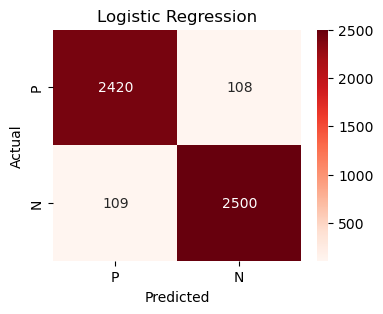

Accuracy: 0.957757445980144
Precision: 0.9568999604586793
Recall: 0.9572784810126582
Specificity: 0.9582215408202377
F1_score: 0.957089183310263


In [40]:
cmatrix(np.array(y_test), lr_predict, 'Logistic Regression')

## Decision Tree

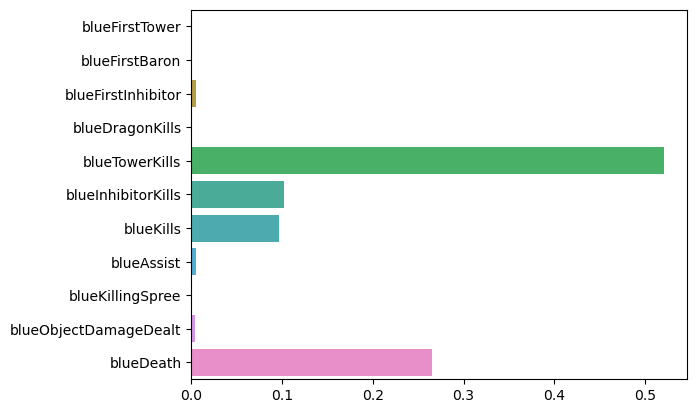

In [25]:
sns.barplot(x=dt.feature_importances_, y=x_train.columns)
plt.show()

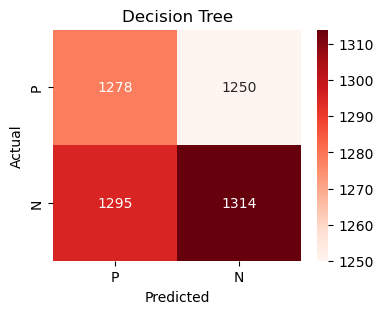

Accuracy: 0.5045746544675881
Precision: 0.4966964632724446
Recall: 0.5055379746835443
Specificity: 0.5036412418551169
F1_score: 0.5010782199568712


In [41]:
cmatrix(np.array(y_test), dt_predict, 'Decision Tree')

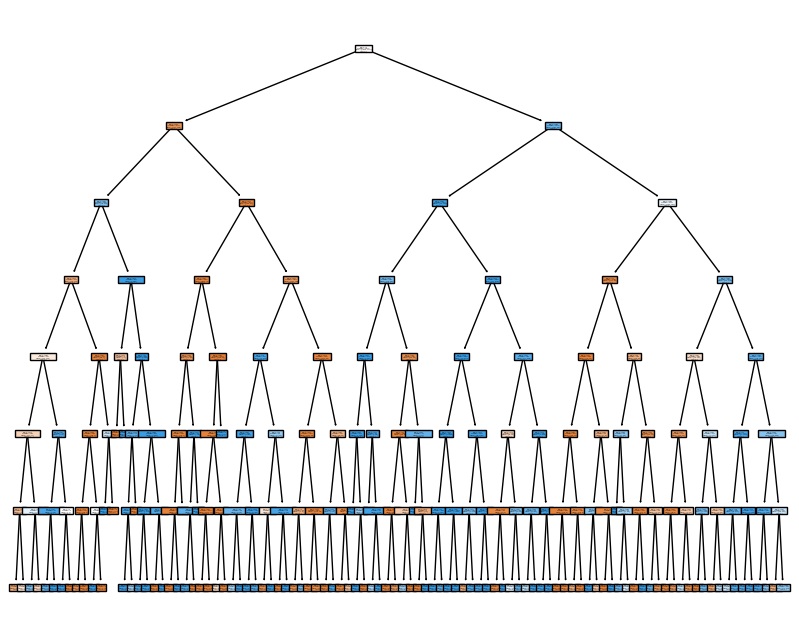

In [42]:
from sklearn import tree
plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names = x_test.columns, class_names = np.unique(y_test.astype('str')), filled=True)
plt.show()

## Random Forest

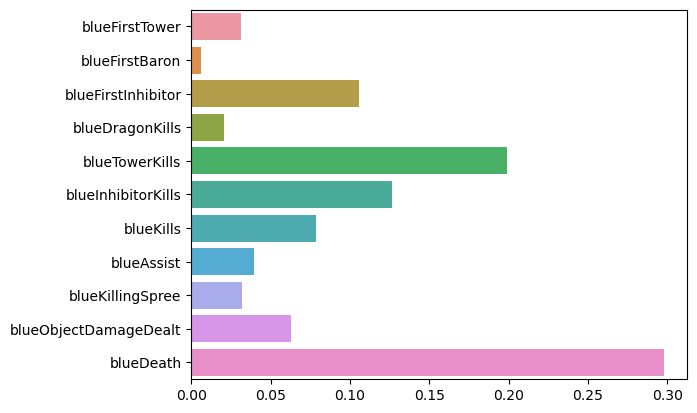

In [61]:
sns.barplot(x=rf.feature_importances_, y=x_train.columns)
plt.show()

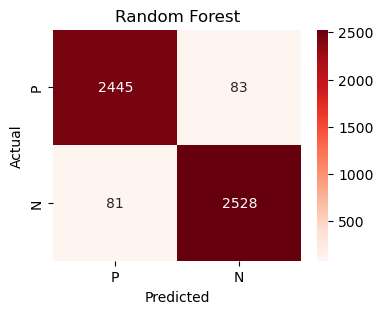

Accuracy: 0.9680747518006618
Precision: 0.9679334916864608
Recall: 0.9671677215189873
Specificity: 0.9689536220774243
F1_score: 0.9675504550850812


In [44]:
cmatrix(np.array(y_test), rf_predict, 'Random Forest')

# Application

* 그랜드 마스터 데이터에 모델 적용하기

In [116]:
adf = pd.read_csv('GrandMaster_Ranked_Games.csv')

In [117]:
ablue_df = adf.iloc[:, 1:26]
ared_df = pd.concat([adf.iloc[:, 1], adf.iloc[:, 26:]], axis=1)

In [118]:
ablue_df

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
1,1686,0,0,1,0,0,0,0,0,2,...,30,70270,47107,601,65,13.0,136,5,20503,31788
2,1588,1,1,1,1,0,1,2,1,10,...,88,102449,59163,613,71,14.2,157,7,28612,67404
3,1126,1,0,1,0,1,0,1,0,4,...,34,56652,39014,486,57,11.4,115,5,17630,37483
4,1262,1,0,0,0,1,1,3,0,7,...,38,57342,42933,509,61,12.2,129,4,13040,48691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,1928,0,1,0,0,0,0,2,0,3,...,40,97060,61378,771,76,15.2,177,4,23467,31943
65892,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486
65893,948,1,1,1,0,0,0,1,0,4,...,19,22427,30001,399,50,10.0,89,3,10791,24827
65894,2479,1,1,0,0,0,0,3,1,7,...,83,142725,82466,803,89,17.8,251,13,67496,98972


In [119]:
ared_df

,gameDuraton,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,2098,1,1,1,0,0,0,3,1,6,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,1686,1,1,0,1,1,1,4,1,7,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,1588,0,0,0,0,1,0,2,0,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,1126,0,1,0,0,0,0,0,0,1,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,1262,0,1,1,0,0,0,0,0,3,...,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,1928,1,0,1,1,1,1,3,1,9,...,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,1837,0,0,1,1,0,0,2,1,4,...,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,948,0,0,0,0,1,0,1,0,0,...,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,2479,0,0,1,1,1,1,3,1,6,...,41,149798,72167,789,86,17.2,258,6,34890,62124


In [120]:
x = ablue_df[corr[1:]]
y = ablue_df['blueWins']

### Logistic Regression

In [121]:
alr_predict = lr.predict(x)
alr_accuracy = accuracy_score(y, alr_predict)
alr_accuracy

0.9455202136700255

### Decision Tree

In [122]:
adt_predict = dt.predict(x)
adt_accuracy = accuracy_score(y, adt_predict)
adt_accuracy

0.9602252033507345

### Random Forest

In [123]:
arf_predict = rf.predict(x)
arf_accuracy = accuracy_score(y, arf_predict)
arf_accuracy

0.9700285298045405

In [130]:
df2 = pd.concat([blue_df, ablue_df])

In [125]:
df2

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,1,2,2,11,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,1928,0,1,0,0,0,0,2,0,3,...,40,97060,61378,771,76,15.2,177,4,23467,31943
65892,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486
65893,948,1,1,1,0,0,0,1,0,4,...,19,22427,30001,399,50,10.0,89,3,10791,24827
65894,2479,1,1,0,0,0,0,3,1,7,...,83,142725,82466,803,89,17.8,251,13,67496,98972


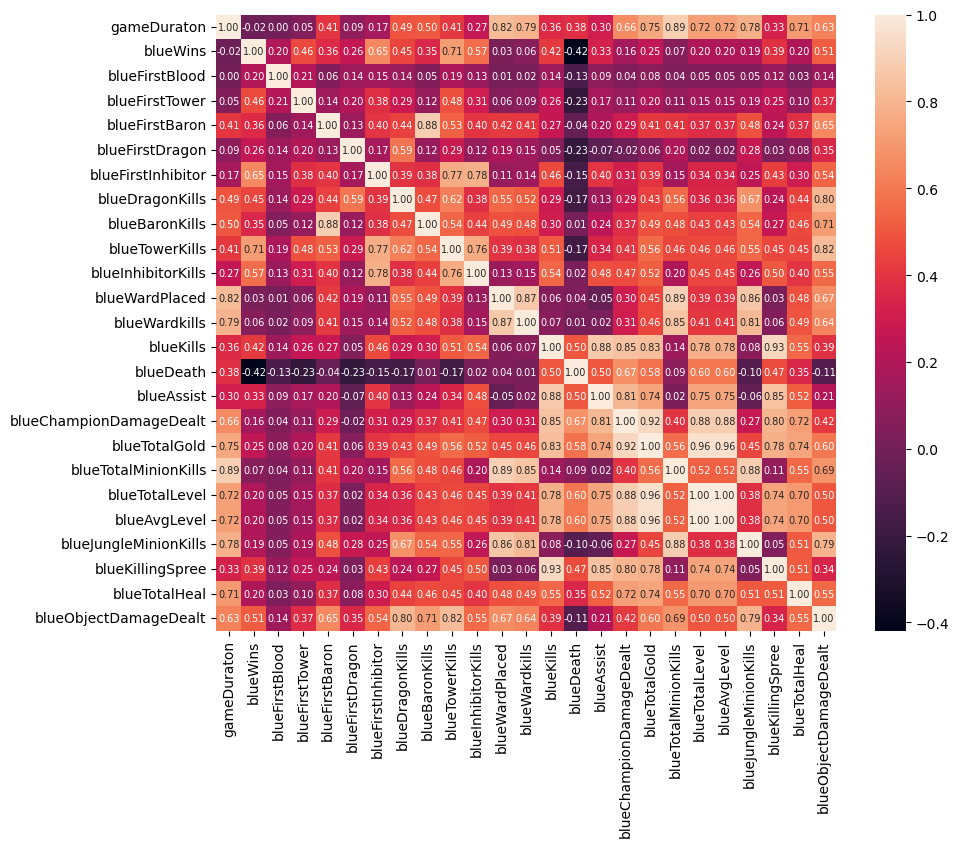

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=ablue_df.corr(), annot=True, annot_kws={"size": 7}, fmt=".2f")
plt.show()

In [126]:
x = df2[corr[1:]]
y = df2['blueWins']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [127]:
for i in blue_df.iloc[:, 2:7].columns:
    display(pd.crosstab(blue_df[i], blue_df['blueWins'], margins=True).style.background_gradient(cmap='Reds'))

blueWins,0,1,All
blueFirstBlood,,,
0,7832,4899,12731
1,5212,7739,12951
All,13044,12638,25682


blueWins,0,1,All
blueFirstTower,,,
0,9187,3040,12227
1,3857,9598,13455
All,13044,12638,25682


blueWins,0,1,All
blueFirstBaron,,,
0,12007,7585,19592
1,1037,5053,6090
All,13044,12638,25682


blueWins,0,1,All
blueFirstDragon,,,
0,9458,5718,15176
1,3586,6920,10506
All,13044,12638,25682


blueWins,0,1,All
blueFirstInhibitor,,,
0,12368,4173,16541
1,676,8465,9141
All,13044,12638,25682
